In [1]:
import json 
import requests
import re

from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

In [2]:
import pandas as pd 

import seaborn as sns 
import spacy
import matplotlib.pyplot as plt

In [3]:
import nltk

In [4]:
# baseurl = "https://digital.janeaddams.ramapo.edu/api/items"
# url_params = {"key" : "ec24a147347176b9f82793ac2d9ace2a9f415bcb", "item_type" : 1, "page" : 0} 
# #item-type integer id in sql file is 1
# #jk you can actually just enter the text for item_type like "Event" 
# #or call resources on api 

In [20]:
# not running this one rn 
# #there are 15487 "Items" total - found from SQL file
# for i in range(0, 5):  
#     url_params["page"] = i 
#     response = requests.get(baseurl, url_params)
#     items.extend(json.loads(response.text))

Each item will be represented by a dictionary which we can then easily load into a df where the keys are the column names. id, text, date, tag, creator, title 

In [30]:
item_list = [] # a list of the dictionary objects 

In [36]:
with open("cache_texts.json") as json_file:
    data = json.load(json_file)
    for page in data: 
        for item in data[page]:
            new_item_dict = {"id" : item["id"], "date" : [], "creator" : [], "type": [], "tags": []}
            for x in item["element_texts"]:
                if x["element"]["name"] == "Text":
                    new_item_dict["text"] = x["text"]
                if x["element"]["name"] == "Date":
                    new_item_dict["date"].append(x["text"])
                if x["element"]["name"] == "Creator":
                    new_item_dict["creator"].append(x["text"])
                if x["element"]["name"] == "Title":
                    new_item_dict["title"] = x["text"]
                if x["element"]["name"] == "Type":
                    new_item_dict["type"].append(x["text"])
            for x in item["tags"]:
                new_item_dict["tags"].append(x["name"])
            item_list.append(new_item_dict)

In [74]:
item_df = pd.DataFrame(item_list)
item_df.head()

,creator,date,id,tags,text,title,type
0,"[Addams, Jane]",[1907-09-05],17,"[Industry, Labor, Writings]","<div style=""text-align: center;"">EFFECT OF FAM...","Effect of Familiarity, September 5, 1907",[article]
1,"[Addams, Jane]",[1906-02-01],18,"[Education, Immigrants, Lectures]","<p style=""text-align: center;"">ELECTIVE OR APP...","Elective or Appointive School Board, February ...",[speech]
2,"[Addams, Jane]",[1914-01-31],19,"[Travels, Writings]","<div style=""text-align: center;"">Hull-House</d...","Jane Addams to James Henry Breasted, January 3...",[letter]
3,"[Addams, Jane]",[1901-01-10],48,[Writing],"THE DELANO <br />\r\n<div style=""text-align: r...","Jane Addams to Richard T. Ely, January 10, 1901",[letter]
4,"[Addams, Jane]",[1901-01-10],49,"[Books, Family]",HULL-HOUSE<br /> 335 SOUTH HALSTED STREET <br ...,"Jane Addams to Sarah Alice Addams Haldeman, Ja...",[letter]


In [26]:
# x = text_list[0]

In [57]:
# cleaning function 
# removes HTML from transcription 
# replace <br> with newline characters  
# replace others with spaces to maintain word separation
# normalizes by making all lowercase
# removes special characters and punctuation
# removes digits
def clean_text(text):
    r = '<br />'
    r1 = '<.*?>'
    r2 = '\r\n'
    r3 = '[^\w\s]'
    r4 = '\d'
    text = re.sub(r, ' ', text)
    text = re.sub(r1, '', text)
    text = re.sub(r2, ' ', text)
    text = text.lower()
    text = re.sub(r3, '', text)
    text = re.sub(r4, '', text)
    return text 

In [58]:
# # test clean text function
# x = clean_text(x)
# x

In [59]:
# next step would be to split into words 
def split_words(text):
    return text.split() 

In [60]:
# # test split_words function
# x = split_words(x)
# x

In [61]:
# function to remove stop words from a piece of text 
# uses the stop words list from spacy 
# input must be a list of words 
def remove_stop_words(text):
    text_words_nostop = []
    for word in text:
        if word not in STOP_WORDS and word != "nbsp":
            text_words_nostop.append(word)
    return text_words_nostop

In [62]:
# # test remove_stop_words function 
# x = remove_stop_words(x)
# x

In [63]:
# after inspecting the text, there are lots of 1 and 2 letter words that are abbreviations 
# this is a function to remove those 
def remove_short_words(text):
    text_no_short = []
    for word in text:
        if not(len(word) == 1 or len(word) == 2):
            text_no_short.append(word)
    return text_no_short

In [64]:
# # test remove_short_words function
# x = remove_short_words(x)
# x

In [65]:
# most common words function 
# will return a counter object of 10 most common words 
# not necessarily part of the pipeline always, more helpful for individual pieces of text 
def most_common(text):
    return Counter(text).most_common(10)

In [66]:
# # text most_common
# most_common(x)

In [37]:
# all_text = []
# for text in text_list:
#     text = clean_text(text)
#     text = split_words(text)
#     text = remove_stop_words(text)
#     text = remove_short_words(text)
#     all_text.extend(text)

In [38]:
# most_common(all_text)

[('chicago', 323),
 ('addams', 277),
 ('miss', 237),
 ('dear', 225),
 ('street', 200),
 ('page', 198),
 ('jane', 188),
 ('hullhouse', 171),
 ('halsted', 141),
 ('mrs', 137)]

In [75]:
#back to the df 
item_df.head()

,creator,date,id,tags,text,title,type
0,"[Addams, Jane]",[1907-09-05],17,"[Industry, Labor, Writings]","<div style=""text-align: center;"">EFFECT OF FAM...","Effect of Familiarity, September 5, 1907",[article]
1,"[Addams, Jane]",[1906-02-01],18,"[Education, Immigrants, Lectures]","<p style=""text-align: center;"">ELECTIVE OR APP...","Elective or Appointive School Board, February ...",[speech]
2,"[Addams, Jane]",[1914-01-31],19,"[Travels, Writings]","<div style=""text-align: center;"">Hull-House</d...","Jane Addams to James Henry Breasted, January 3...",[letter]
3,"[Addams, Jane]",[1901-01-10],48,[Writing],"THE DELANO <br />\r\n<div style=""text-align: r...","Jane Addams to Richard T. Ely, January 10, 1901",[letter]
4,"[Addams, Jane]",[1901-01-10],49,"[Books, Family]",HULL-HOUSE<br /> 335 SOUTH HALSTED STREET <br ...,"Jane Addams to Sarah Alice Addams Haldeman, Ja...",[letter]


In [76]:
#clean and replace text column 
# for text in text_list:
#     text = clean_text(text)
#     text = split_words(text)
#     text = remove_stop_words(text)
#     text = remove_short_words(text)
#     all_text.extend(text)
item_df["text"] = item_df["text"].apply(clean_text)
item_df["text"] = item_df["text"].apply(split_words)
item_df["text"] = item_df["text"].apply(remove_stop_words)
item_df["text"] = item_df["text"].apply(remove_short_words)
item_df.head()

,creator,date,id,tags,text,title,type
0,"[Addams, Jane]",[1907-09-05],17,"[Industry, Labor, Writings]","[effect, familiarity, jane, addams, hard, fami...","Effect of Familiarity, September 5, 1907",[article]
1,"[Addams, Jane]",[1906-02-01],18,"[Education, Immigrants, Lectures]","[elective, appointive, school, board, jane, ad...","Elective or Appointive School Board, February ...",[speech]
2,"[Addams, Jane]",[1914-01-31],19,"[Travels, Writings]","[hullhouse, south, halsted, street, chicago, j...","Jane Addams to James Henry Breasted, January 3...",[letter]
3,"[Addams, Jane]",[1901-01-10],48,[Writing],"[delano, burlington, iowa, jany, dear, ely, at...","Jane Addams to Richard T. Ely, January 10, 1901",[letter]
4,"[Addams, Jane]",[1901-01-10],49,"[Books, Family]","[hullhouse, south, halsted, street, chicago, j...","Jane Addams to Sarah Alice Addams Haldeman, Ja...",[letter]


In [80]:
flattened_text_list = []
for x in item_df["text"]:
    flattened_text_list.extend(x)

In [81]:
most_common(flattened_text_list)

[('chicago', 323),
 ('addams', 277),
 ('miss', 237),
 ('dear', 225),
 ('street', 200),
 ('page', 198),
 ('jane', 188),
 ('hullhouse', 171),
 ('halsted', 141),
 ('mrs', 137)]

In [83]:
flattened_creator_list = []
for x in item_df["creator"]:
    flattened_creator_list.extend(x)
creator_series = pd.Series(flattened_creator_list)

In [84]:
creator_series.value_counts()

Addams, Jane                      155
Ely, Richard T.                    11
Jones, Jenkin Lloyd                 5
Macmillan Company                   4
Harrison, Frederic                  4
Ely, Richard T.                     3
Riis, Jacob A.                      2
Moody, William Vaughn               2
Maltbie, Milo Roy                   2
Van Dine, Sophia Engel              2
Robins, Raymond                     2
Yates, Richard                      2
Chicago Daily News                  2
Lawson, Victor Fremont              2
Rowe, Frederick H.                  2
Goldman, Emma                       2
Jones, Samuel M.                    2
Kropotkin, Pyotr Alexeyevich        2
James, Edmund J.                    2
Addams, Jane                        2
Reform Club                         2
Adams, Henry Carter                 2
Hill, Mary Dorsey Anderson          2
Adams, Myron E.                     1
Blaine, Anita McCormick             1
Stewart, Lettie Cox                 1
Hartt, Rolli

In [85]:
for item in item_df["date"]: 
    if len(item) > 1: 
        print(item)

['1902-05-01', '1903-04-30']
['1903-09-20', '1904-09-20', '1905-09-20']


In [94]:
len(item_df["id"].unique())

200

In [39]:
# i don't know what these are or what to do with them ????? 
# sorted(all_text, key=len, reverse=True)

In [40]:
pd.Series(x).value_counts()

life           5
industrial     3
familiar       3
shows          2
invention      2
interesting    2
development    2
familiarity    2
products       2
number         2
young          2
artist         2
avoided        1
children       1
notion         1
exist          1
apathy         1
cheapness      1
companions     1
miss           1
goes           1
increases      1
attention      1
original       1
factories      1
stream         1
seen           1
essence        1
share          1
desire         1
              ..
missing        1
blind          1
selected       1
science        1
inquire        1
produced       1
interests      1
speed          1
actually       1
large          1
new            1
nervous        1
streams        1
objects        1
immediate      1
suspect        1
makes          1
filling        1
isolates       1
totally        1
effect         1
human          1
light          1
girls          1
novelist       1
resent         1
purchasers     1
night         

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


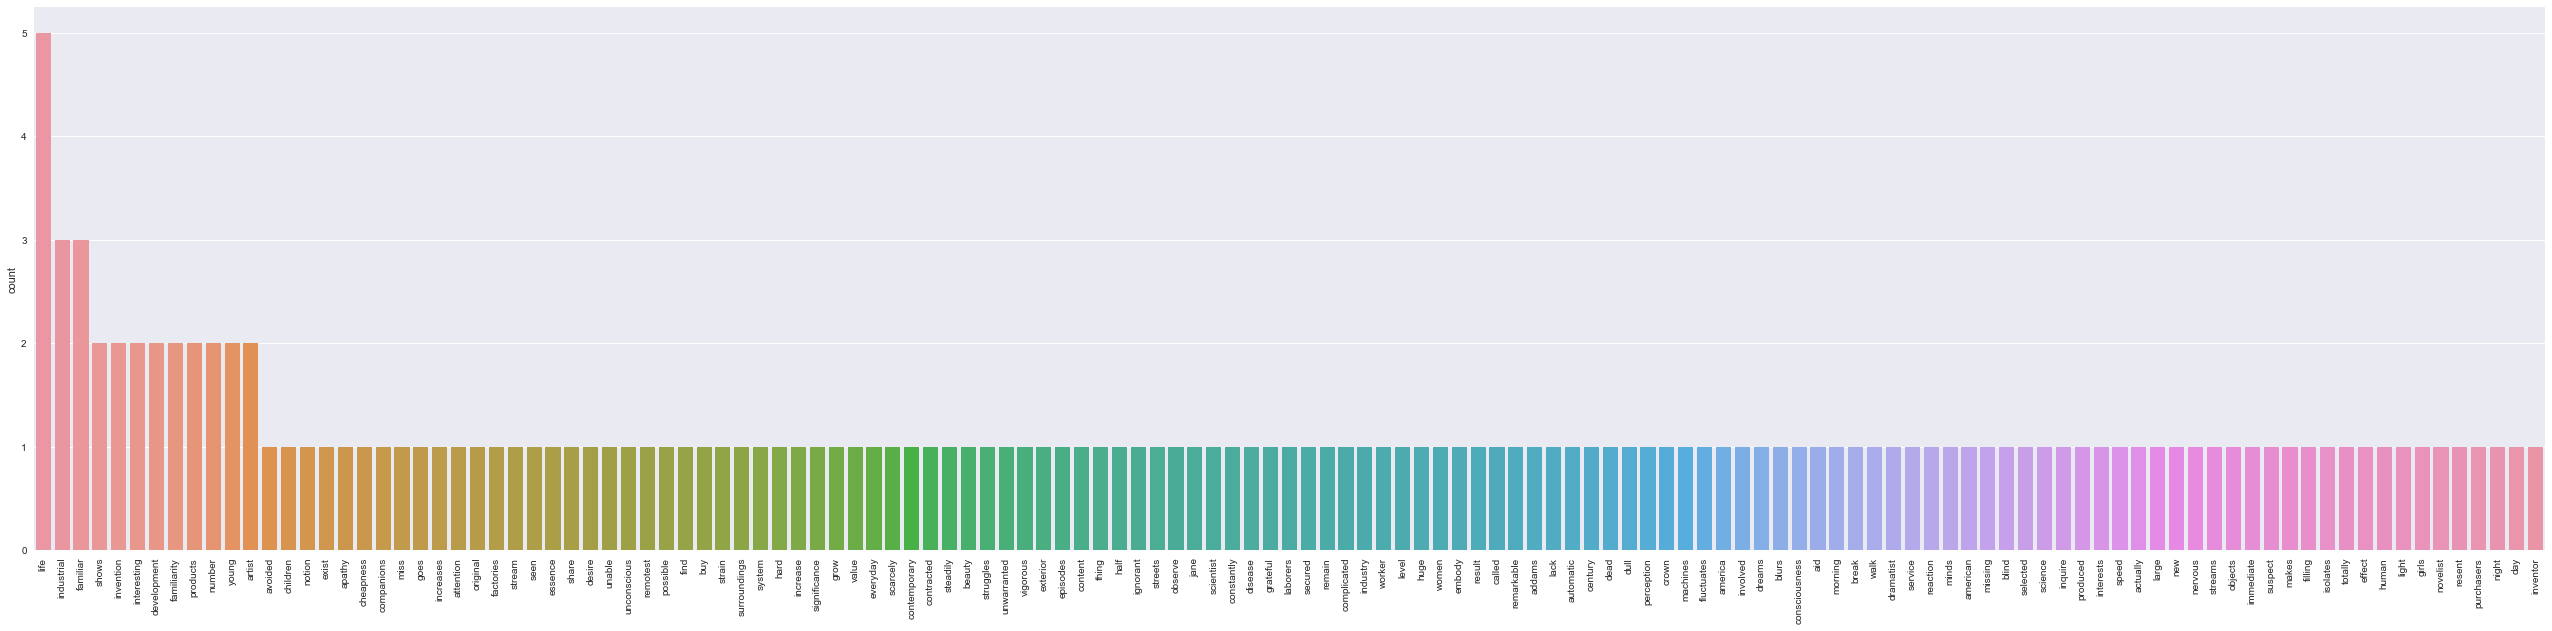

In [41]:
plt.figure(figsize=(45,10))
sns.countplot(x, order=pd.Series(x).value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [42]:
def bigrams(text):
    result = list(nltk.ngrams(text, 2))
    return result 

In [43]:
x_bigrams = bigrams(x)


In [44]:
pd.Series(x_bigrams).value_counts()

(industrial, development)    2
(filling, streets)           1
(dead, level)                1
(life, goes)                 1
(vigorous, minds)            1
(observe, stream)            1
(objects, attention)         1
(industrial, life)           1
(find, dramatist)            1
(episodes, makes)            1
(embody, purchasers)         1
(exterior, huge)             1
(hard, familiar)             1
(nervous, system)            1
(resent, dead)               1
(dreams, artist)             1
(notion, life)               1
(produced, constantly)       1
(everyday, episodes)         1
(strain, nervous)            1
(invention, streams)         1
(familiarity, unable)        1
(possible, life)             1
(apathy, exist)              1
(young, women)               1
(industry, called)           1
(factories, content)         1
(essence, life)              1
(machines, crown)            1
(dramatist, isolates)        1
                            ..
(american, industrial)       1
(speed, 